In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tsp import TSP

tspa_problem = TSP.from_csv("../data/" + "TSPA" + ".csv")
tspb_problem = TSP.from_csv("../data/" + "TSPB" + ".csv")

# Load the data
df_tspa = pd.read_csv("../results/assignment4_tspa.csv")
df_tspb = pd.read_csv("../results/assignment4_tspb.csv")
tspa_npz = np.load("../results/TSPA_intra_edge_greedy_random.npz")
tspb_npz = np.load("../results/TSPB_intra_edge_greedy_random.npz")

In [2]:
def similarity_common_nodes(sol1, sol2):
    return len(set(sol1).intersection(sol2))


def similarity_common_edges(solution1: np.ndarray, solution2: np.ndarray):
    # Get edges as sorted pairs of consecutive nodes
    edges1 = np.sort(np.column_stack([solution1[:-1], solution1[1:]]), axis=1)
    edges2 = np.sort(np.column_stack([solution2[:-1], solution2[1:]]), axis=1)

    # Convert edges to sets of tuples for comparison
    edges1_set = set(map(tuple, edges1))
    edges2_set = set(map(tuple, edges2))

    # Find the intersection of the two sets and count the common edges
    common_edges = edges1_set & edges2_set
    return len(common_edges)

In [3]:
df_tspa_np = df_tspa["score"].to_numpy()
df_tspb_np = df_tspb["score"].to_numpy()
tspa_npz_np = tspa_npz["sols"]
tspb_npz_np = tspb_npz["sols"]

In [21]:
instances = ["TSPA", "TSPB"]
scores_list = [df_tspa_np, df_tspb_np]
solutions = [tspa_npz_np, tspb_npz_np]

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

plt.style.use("ggplot")


def plotting(
    y, clean_scores, instance_name, mode, is_cast_to_int=False, similarity_type="Nodes"
):
    x = clean_scores
    if is_cast_to_int:
        y = y.astype(int)
    coef = pearsonr(x, y)
    plt.scatter(x, y)
    plt.title(f"{instance_name} {similarity_type} {mode} | coef={coef[0]:.2f}")
    plt.xlabel("Score")
    plt.ylabel("Similarity")
    plt.show()

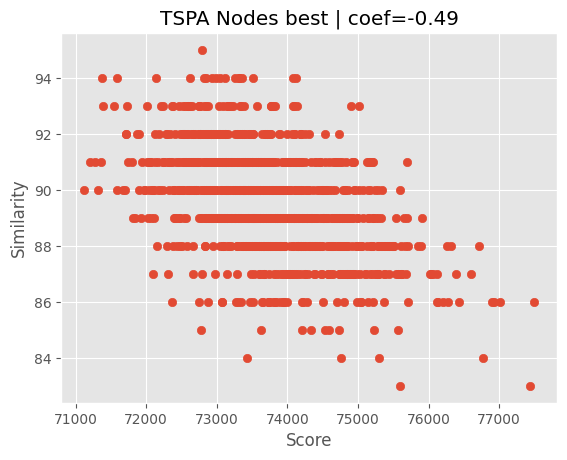

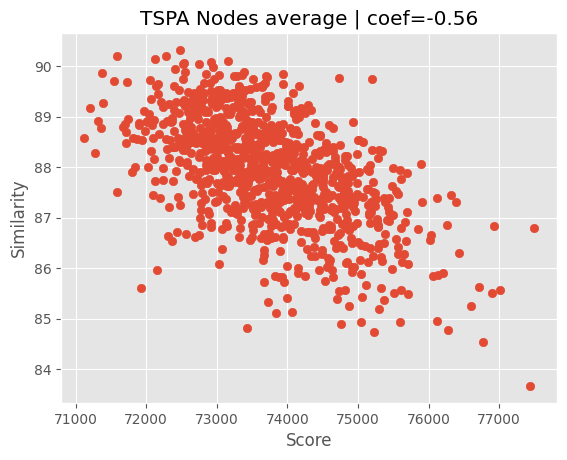

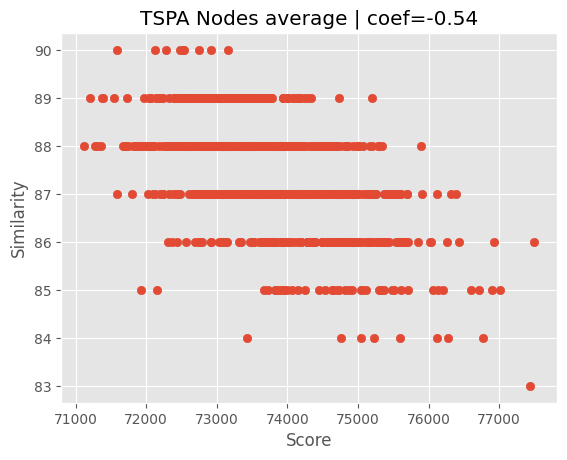

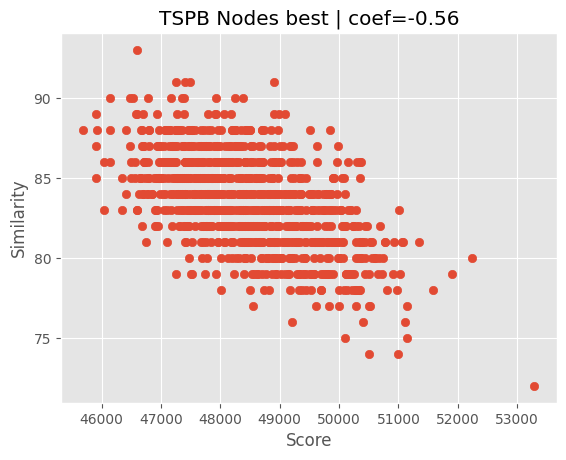

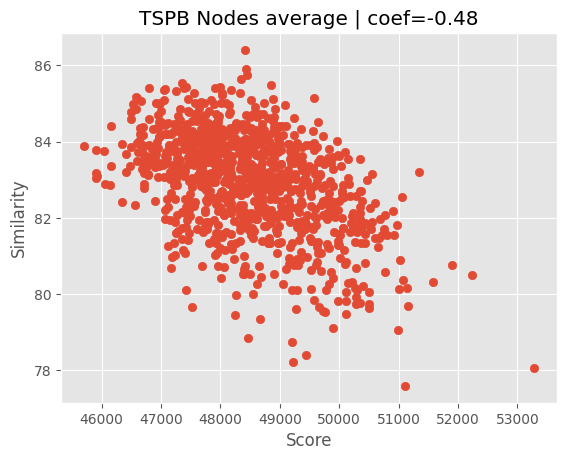

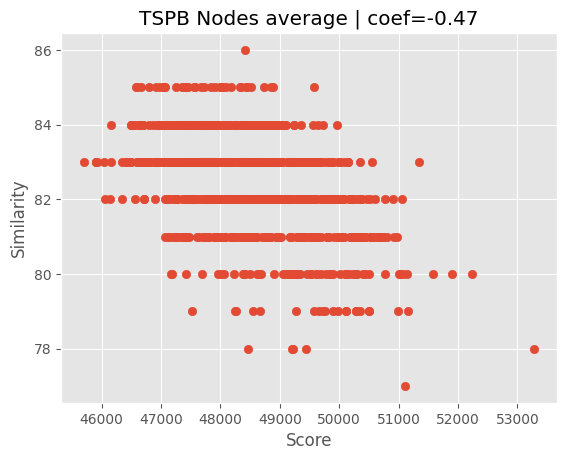

In [47]:
for i_instance, instance_name in enumerate(instances):
    similarity_matrix = np.zeros(
        (solutions[i_instance].shape[0], solutions[i_instance].shape[0])
    )
    best_sol_idx = scores_list[i_instance].argmin()
    best_sol = solutions[i_instance][best_sol_idx]

    # matrix is symmetric, so we only need to calculate the upper triangle
    for i in range(solutions[i_instance].shape[0]):
        for j in range(i, solutions[i_instance].shape[0]):
            similarity_matrix[i, j] = similarity_common_nodes(
                solutions[i_instance][i], solutions[i_instance][j]
            )
            similarity_matrix[j, i] = similarity_matrix[i, j]

    clean_similairty_matrix = similarity_matrix.copy()
    clean_scores = np.delete(scores_list[i_instance], best_sol_idx)

    mode = "best"
    result_best = np.delete(clean_similairty_matrix[best_sol_idx], best_sol_idx)
    plotting(result_best, clean_scores, instance_name, mode)

    mode = "average"
    clean_similairty_matrix = np.delete(clean_similairty_matrix, best_sol_idx, axis=0)
    clean_similairty_matrix = np.delete(clean_similairty_matrix, best_sol_idx, axis=1)
    sum_without_self = clean_similairty_matrix.sum(axis=0) - 100
    result_average = sum_without_self / (clean_similairty_matrix.shape[0] - 1)
    plotting(result_average, clean_scores, instance_name, mode)
    plotting(result_average, clean_scores, instance_name, mode, is_cast_to_int=True)

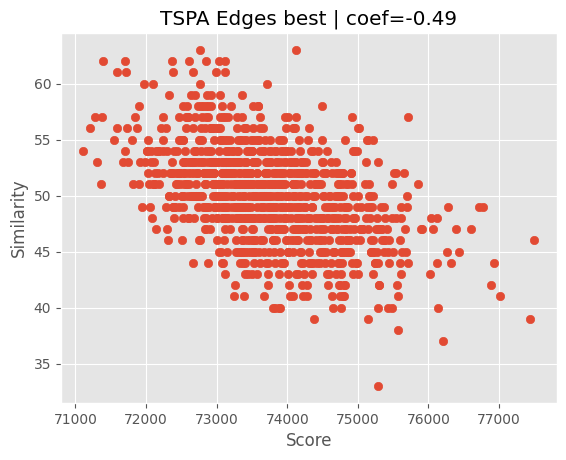

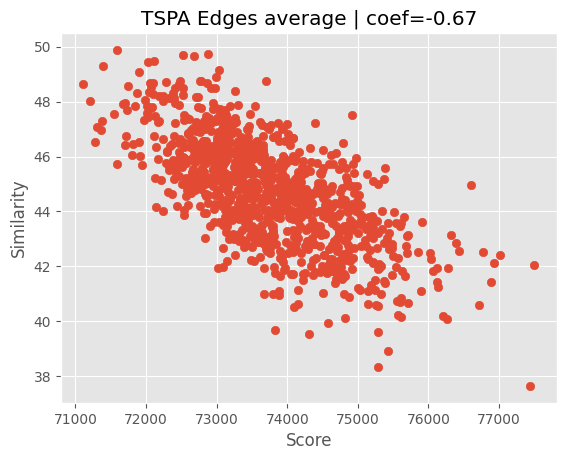

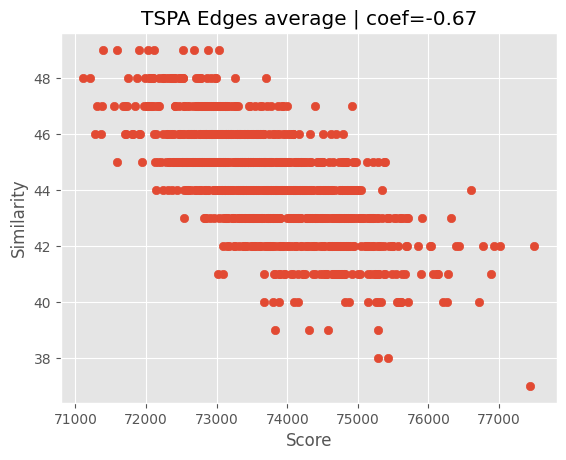

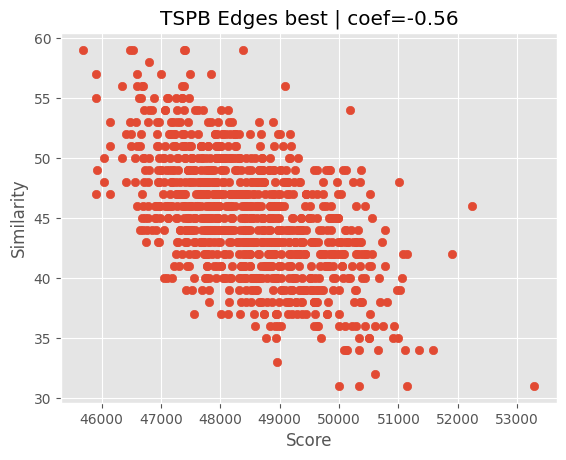

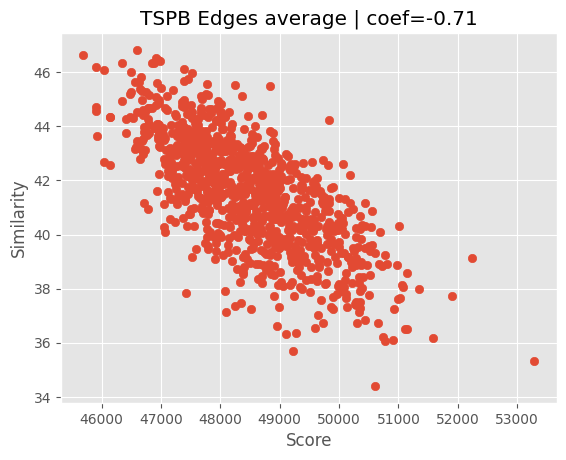

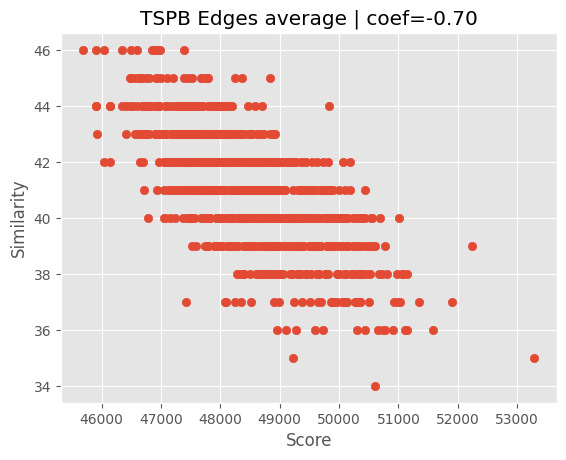

In [52]:
for i_instance, instance_name in enumerate(instances):
    similarity_type = "Edges"
    similarity_matrix = np.zeros(
        (solutions[i_instance].shape[0], solutions[i_instance].shape[0])
    )
    best_sol_idx = scores_list[i_instance].argmin()
    best_sol = solutions[i_instance][best_sol_idx]

    # matrix is symmetric, so we only need to calculate the upper triangle
    for i in range(solutions[i_instance].shape[0]):
        for j in range(i, solutions[i_instance].shape[0]):
            similarity_matrix[i, j] = similarity_common_edges(
                solutions[i_instance][i], solutions[i_instance][j]
            )
            similarity_matrix[j, i] = similarity_matrix[i, j]

    clean_similairty_matrix = similarity_matrix.copy()
    clean_scores = np.delete(scores_list[i_instance], best_sol_idx)

    mode = "best"
    result_best = np.delete(clean_similairty_matrix[best_sol_idx], best_sol_idx)
    plotting(
        result_best, clean_scores, instance_name, mode, similarity_type=similarity_type
    )

    mode = "average"
    clean_similairty_matrix = np.delete(clean_similairty_matrix, best_sol_idx, axis=0)
    clean_similairty_matrix = np.delete(clean_similairty_matrix, best_sol_idx, axis=1)
    sum_without_self = clean_similairty_matrix.sum(axis=0) - 100
    result_average = sum_without_self / (clean_similairty_matrix.shape[0] - 1)
    plotting(
        result_average,
        clean_scores,
        instance_name,
        mode,
        similarity_type=similarity_type,
    )
    plotting(
        result_average,
        clean_scores,
        instance_name,
        mode,
        is_cast_to_int=True,
        similarity_type=similarity_type,
    )